## Scikit-learn Creating Machine Learning Models (sklearn)

#### 0. Dataframes used

In [29]:
#These are all the different dataframes used in the examples:

heart_disease = pd.read_csv("../13.1 heart-disease.csv")

car_sales_extended = pd.read_csv("../car-sales-extended.csv")

car_sales_missing_extended = pd.read_csv("../car-sales-extended-missing-data.csv")

from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])


C:\Users\noort\.conda\envs\kitsu-katsu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

### 1.1 End-to-end Scikit-Learn workflow

In [7]:
#getting the data ready
import pandas as pd
import numpy as np
import sklearn
heart_disease = pd.read_csv("../13.1 heart-disease.csv")

#making a feautures matrix
#we want the whole dataset except for the column target
x = heart_disease.drop("target", axis=1)

#making labels
y = heart_disease["target"]

In [15]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
#fit the model to the training data
from sklearn.model_selection import train_test_split

#splitting the data into train and test (80% training)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#make the model find the patterns
clf = RandomForestClassifier()
clf.fit(x_train, y_train);

In [20]:
#make a prediction
y_preds = clf.predict(x_test)
print(y_preds)

[1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1]


In [21]:
#evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [22]:
clf.score(x_test, y_test)

0.8524590163934426

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.87      0.89      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



In [24]:
confusion_matrix(y_test, y_preds)

array([[19,  5],
       [ 4, 33]], dtype=int64)

In [25]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [29]:
#How to improve the model
#try different amount of n_estimators
np.random.seed(0)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators..")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

trying model with 10 estimators..
Model accuracy on test set: 81.97%
 
trying model with 20 estimators..
Model accuracy on test set: 85.25%
 
trying model with 30 estimators..
Model accuracy on test set: 81.97%
 
trying model with 40 estimators..
Model accuracy on test set: 86.89%
 
trying model with 50 estimators..
Model accuracy on test set: 85.25%
 
trying model with 60 estimators..
Model accuracy on test set: 85.25%
 
trying model with 70 estimators..
Model accuracy on test set: 86.89%
 
trying model with 80 estimators..
Model accuracy on test set: 83.61%
 
trying model with 90 estimators..
Model accuracy on test set: 83.61%
 


In [30]:
#save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [31]:
#load our model again
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

### 1.2 Debugging warnings

In [36]:
import warnings

#how to ignore all the warnings
warnings.filterwarnings("ignore")

#how to set that back
warnings.filterwarnings("default")

#how to tell what version of scikitlearn your working on
sklearn.show_versions()

#some warnings you get because according to your sklearn version there are
#standard parameters, it's warning you for that
#you could avoid that by giving it a paramter yourself like this:
#n_estimators=... (in your model)



System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\noort\.conda\envs\kitsu-katsu\python.exe
   machine: Windows-10-10.0.19043-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.2
        numpy: 1.22.0
        scipy: 1.7.3
       Cython: None
       pandas: 1.3.5
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 3.0.0

Built with OpenMP: True


### 2.1 Splitting data into features (x,y)

In [51]:
#standard imports; numpy, pandas, matplotlib.pyplot, matplotlib inline

#we want to remove our target column for x
x = heart_disease.drop("target", axis=1)

#we want to get only our target column for y
y = heart_disease["target"]

#splitting data intro training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#see the difference in sizes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#our amount of columns is 13
#the number on x shows the amount of rows

((242, 13), (61, 13), (242,), (61,))

### 2.2 Converting non-numerical values to numerical (featuring encoding)

In [ ]:
#Important Note:
#Always split your data first before filling/transforming your data
#Don't fill/transform your train and test data together, always seperate

In [52]:
car_sales_extended = pd.read_csv("../car-sales-extended.csv")
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


#### One Hot Encoder

In [62]:
#machine learning cannot deal with strings, import these:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#define x and y
X = car_sales_extended.drop(['Price'], axis = 1)
y = car_sales_extended['Price']

#list your cateogrical features
#Dont forget that some numbers are better to be seen as categories
categorical_features = ["Make", "Colour", "Doors"]

#code the transformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

#code what the transformer does
transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [63]:
pd.DataFrame(transformed_x)

#we have devided the categories into the possible values, 'toyota' or 'BMW'
#and given every row a 1 one the value in the categorie applies for that row
#and given all the other values a 0
#this is called One Hot Encoding

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


#### Dummies

In [65]:
#The dummies way for the same thing
dummies = pd.get_dummies(car_sales_extended[["Make", "Colour","Doors"]])
dummies

#this didnt work on Doors because it is numerical, only works on true categorical

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [101]:
#Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
model.score(X_test, y_test)

0.3235867221569877

### 2.3 Filling/Imputing or disregarding missing values

In [ ]:
#Important Note:
#Always split your data first before filling/transforming your data
#Don't fill/transform your train and test data together, always seperate

In [114]:
#two main ways to missing data
#1. fill them with some value
#2. Remove the samples with missing data
#With Pandas or Scikit

car_sales_missing_extended = pd.read_csv("../car-sales-extended-missing-data.csv")

#check how many missing values it has
car_sales_missing_extended.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Fill/Remove with Pandas

In [110]:
#fill a categorical column
car_sales_missing_extended["Make"].fillna("missing", inplace=True)
car_sales_missing_extended["Colour"].fillna("missing", inplace=True)

#fill a numerical column
car_sales_missing_extended["Odometer (KM)"].fillna(car_sales_missing_extended["Odometer (KM)"].mean(), inplace=True)
car_sales_missing_extended["Doors"].fillna(4, inplace=True)

##### Remove samples with missing value

In [111]:
#because only price has missing values missing
car_sales_missing_extended.dropna(inplace=True)

##### Convert it to numbers

In [113]:
X = car_sales_missing_extended.drop(['Price'], axis = 1)
y = car_sales_missing_extended['Price']

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing_extended)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Fill/Remove with Scikit

In [118]:
car_sales_missing_missing = pd.read_csv("../car-sales-extended-missing-data.csv")

#drop the missing data of price, cause we cant replace them
car_sales_missing_missing.dropna(subset=["Price"], inplace=True)

#first split data
X = car_sales_missing_missing.drop(["Price"], axis=1)
y = car_sales_missing_missing["Price"]

In [119]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [123]:
#Making imputers: Giving them the function of what we want them to do
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

#if the strategy is constant, we have to give it a fill value
#meaning: if you find the categorical value, fill them constantly with missing.


#define which columns need which imputer
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features), ("door_imputer", door_imputer, door_features), ("num_imputer", num_imputer, num_features)])

#ColumnTransformer takes a list of what it needs to change
#Within the list we create tuples
#The value ".." is going to use the second value (imputer) on the third value (the features)

#transform the data
filled_X = imputer.fit_transform(X)
filled_X

#fill in X because that's the part of the data we want to use it on

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [125]:
#get this do a df
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [127]:
#Then make them numerical
X = car_sales_filled
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [132]:
#Fit a model
np.random.seed(9)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.33231910836115286

### 3.1 Choosing the right model (examples)

In [147]:
#Estimator = learning model or algoritm
#Classification = predicting category
#Regression = predicting number
#Ensemble method = combining different models
#Decision tree = computer creates own if-else-function
#Structured data? Ensemble methods usually work the best.
#Unstructured data? Use deep/transfer learning


#### Getting a standard df from scikit

In [148]:
#there is a standard dataset you can always use for sk learn
from sklearn.datasets import load_boston
boston = load_boston()

#because it is in a dict, we want a dataframe
#you can set the columns to be the feature names from the dict
#then create a target column from the target column
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

C:\Users\noort\.conda\envs\kitsu-katsu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Ridge Regression Model

In [135]:
from sklearn.linear_model import Ridge
np.random.seed(0)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

#improve the model by looking at the map again

0.5796111714164923

#### Random forest regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.7574875341278705

In [142]:
heart_disease = pd.read_csv("../13.1 heart-disease.csv")

#### Linear SVC

In [144]:
from sklearn.svm import LinearSVC
np.random.seed(9)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#the liblinear warning can be overcome by adding in LinearSVC(max_iter=2000)

C:\Users\noort\.conda\envs\kitsu-katsu\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.47540983606557374

#### Ensemble classifier / RandomForestClassifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8032786885245902

### 3.2 Fitting model (explanation) and prediction calculation

#### Expl.: Fitting model to data

In [150]:
# X = features (variables) or data
# y = labels, class or target (variable)

#model.fit = training the machine learning model
#model.score = using the partner the model has

#First step in fitting a model, is looking at the features and targets

#### Expl.: Make predictions using machine learning models

In [ ]:
#Two main ways to predict using a trained model:
#1. predict()
#2. predict_proba()

##### Expl.: .predict()

In [151]:
#You do the same as with model.score(X_test)
#But you get it in the same format as your target (np.array)

rfc.predict(X_test)
#You need the same amount of dimensions (rows&columns)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [152]:
#Compare predictions to truth labels to evaluate the model

y_preds = rfc.predict(X_test)
#Useful to make a different variables for the predictions

np.mean(y_preds == y_test)
#It's the same as the model.score()
#This is possible because of the same format

0.8032786885245902

In [153]:
#.predict() with sklearn metrics

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)
#Gives the mean
#Does the same but in different way

0.8032786885245902

##### Expl.: .predict_proba()

In [155]:
#Returns probabilities of a classification label
#It does the same, but it returns something different
#Instead of returning the label, it returns the probability of that label being true
#One row shows both possiblities (0 and 1) and shows the probability of that 0 (or 1) being true

#Use this to see the strength of the prediction, this gives you the possibility to:
#See the strength of model
#Remove samples with weak probabilities
#Look at individual samples to see what makes it strong or weak

rfc.predict_proba(X_test[:5]) #Just for show, we only want the first 5


array([[0.26, 0.74],
       [0.93, 0.07],
       [0.16, 0.84],
       [0.95, 0.05],
       [0.94, 0.06]])

#### Calculating predictions

In [158]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(9)

X= boston_df.drop("target", axis=1)
y= boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train) #just a shorter way

#Make predictions
y_preds = model.predict(X_test)

In [159]:
#The predictions the model made and the actual target:
y_preds[:10], np.array(y_test[:10])

(array([21.8  , 13.931, 29.985, 16.501, 19.997, 19.897, 30.007, 34.231,
        18.015, 16.507]),
 array([21.4,  8.4, 33.1, 13.6, 18.5, 23.8, 35.1, 36.2, 17.7, 15.6]))

In [160]:
#Compare the predictions to the truth
#Calculates the difference, adds them up and gives the mean of difference
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.4057941176470594

### 4.1 Evaluating a classification model

In [48]:
#Accuracy: Is a goof measure to start with if all classed are balanced.
#Precision and Recall: Become more important when classes are imbalanced.
# -If false positive predictions are worse than false negative, aim for higher precision.
# -If false negative predictions are worse than false positive, aim for higher recall.
#F1-score: Is a combination of precision and recall.

#### Estimator score method

In [18]:
#Making a model to evaluate
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)

In [167]:
#.score()
#It depends on the model how the score method works
clf.score(X_test, y_test)

0.8032786885245902

#### The scoring paramater & Accuracy

In [171]:
#Cross validations makes different versions of the training and testing data set and gived the score
#This avoids luck based on what data is training and what is testing
#cv or k-folds = the amount of different versions it uses with training and testing
#Change the amount of folds with the parameter cv=...

#Import the method
from sklearn.model_selection import cross_val_score

#Using the method
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.80327869, 0.83333333, 0.73333333])

In [16]:
#How to take the mean of the method: Accuracy
clf_score_val_score = np.mean(cross_val_score(clf, X, y))
clf_score_val_score

0.8313661202185791

In [ ]:
#The default scoring parameter is set to None, meaning
#It uses the scoring parameter that best suits the model, same as .score()
#This can be changed with scoring=...

#### Classification model evaluation metrics

##### Area under the receiver operating characteristic curve (AUC/ROC)

In [ ]:
#It compares of a models true positive rate (TPR) versus a false positive rate (FPR)
#True positive = model predicts 1 when the truth is 1
#False positive = model predicts 1 when the truth is 0
#Same goes for the true/false negative

In [23]:
from sklearn.metrics import roc_curve

#Make predictions with probabilities
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)

#Keep the positive classes (because we don't want true/false negatives)
y_probs_positive = y_probs[:, 1] #we only the rows with target 1

#Calculate fpr, tpr and tresholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04347826, 0.04347826,
       0.04347826, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.17391304, 0.2173913 , 0.2173913 , 0.2173913 , 0.2173913 ,
       0.26086957, 0.26086957, 0.30434783, 0.39130435, 0.39130435,
       0.43478261, 0.47826087, 0.47826087, 0.60869565, 0.73913043,
       0.82608696, 0.91304348, 1.        ])

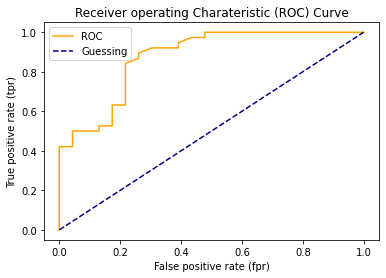

In [25]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr)
    and true positive rate (tpr) of a model.
    """

#Plot ROC curve
plt.plot(fpr, tpr, color="orange", label="ROC")

#Plot line with no predicitve power (baseline)
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

#Customize the plot
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("Receiver operating Charateristic (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr,tpr)

In [27]:
#Get the AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

#This is the probability or area under the curve
#A 1.0 probability is a perfect curve
#You can use the graph or the score the represent the ROC Curve


0.8747139588100687

##### The confusion matrix

In [31]:
#Confusion matrix = a quick way to compare the labels a model predicts and 
#the acual labels it was supposed to product.
#In essence, giving an idea where the model is getting confused


In [32]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[18,  5],
       [ 6, 32]], dtype=int64)

In [33]:
#Visualize matrix with pd.crosstab()
#You can cross reference what the model predicted and what the actual labels were.
pd.crosstab(y_test, y_preds, rownames=["Actual label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual label,,
0,18,5
1,6,32


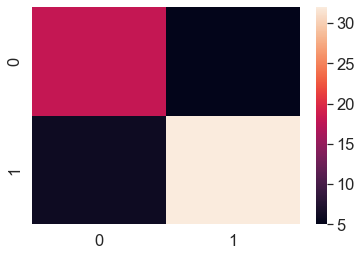

In [43]:
#Visualize matrix with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

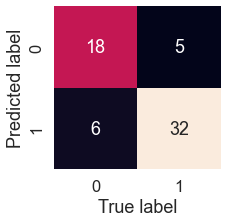

In [44]:
#Making it a function and customizing
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """

fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat, annot=True, cbar=False) #Annotate the boxes with conf_mat info

plt.xlabel("True label")
plt.ylabel("Predicted label");


##### Classification report

In [47]:
#Import
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

#Can also do it like this
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.86      0.84      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



,0,1,accuracy,macro avg,weighted avg
precision,0.750000,0.864865,0.819672,0.807432,0.821555
recall,0.782609,0.842105,0.819672,0.812357,0.819672
f1-score,0.765957,0.853333,0.819672,0.809645,0.820388
support,23.000000,38.000000,0.819672,61.000000,61.000000


In [ ]:
#Precision and recall become more valuable when the ratio for 0 and 1 is out of balance (100/1)


### 4.2 Evaluating a regression model

In [64]:
#3 most common:
#R^2 or coefficient of determination (you want to maximize this one)
#Mean absolute error (MAE) (you want to minimize this one)
#Mean squared error (MSE) (also minimize, and most likely to use)

#### R^2

In [ ]:
#Compares the models predictions to the mean of the targets
#A value of 1.0 is the highest possible

In [52]:
#Getting the data first
from sklearn.ensemble import RandomForestRegressor
np.random.seed(9)
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [55]:
#Import the metric
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

#Comparing to the mean
r2_score(y_test, y_test_mean)

0.0

#### Mean absolute error (MAE)

In [62]:
#It is the average of the absolute difference between predictions and actual values
#It gives an idea of how wrong the model's predictions are
#The actual value is inside the range of the predicted value -MAE and +MAE.

#Use this: When being 10,000 is twice as bad as being 5,000 off.

In [58]:
#Getting the MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.4057941176470594

In [61]:

#Visualizing MAE
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
464,21.4,21.800,0.400
419,8.4,13.931,5.531
277,33.1,29.985,-3.115
491,13.6,16.501,2.901
337,18.5,19.997,1.497
...,...,...,...
34,13.5,14.844,1.344
335,21.1,20.578,-0.522
159,23.3,28.018,4.718
89,28.7,33.959,5.259


#### Mean squared error (MSE)

In [ ]:
#It squares the mean absolute error (MAE) and takes the average
#Gives a better indication of how far off your model's predictions are on average.
#This method amplifies larger differences

#Use this: When being 10,000 off is more than twice as bad as being 5,000 off.

In [63]:
#Getting the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)

### 4.3 Evaluating based on scoring parameter and metric functions

#### Scoring parameter: Classification model

In [8]:
#Importing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]
clf = RandomForestClassifier()

In [18]:
#Get the cross val score
np.random.seed(9)
cv_acc = cross_val_score(clf, X, y) #scoring parameter=None
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%") 

The cross-validated accuracy is: 82.16%


In [24]:
#Set the scoring parameter to accuracy
np.random.seed(9)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%") 

The cross-validated accuracy is: 82.16%


In [26]:
#Get precision
cv_precision = cross_val_score(clf, X, y, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%") 

The cross-validated precision is: 84.65%


In [27]:
#Get recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%") 

The cross-validated recall is: 85.45%


In [28]:
#Get f1 (combination of precision and recall)
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
print(f"The cross-validated precision and recall combined is: {np.mean(cv_f1)*100:.2f}%") 

The cross-validated precision and recall combined is: 84.97%


#### Scoring parameter: Regression model

In [32]:
#Importing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn import train_test_split
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()


In [36]:
#Default score is R^2
np.random.seed(9)
cv_r2 = cross_val_score(model, X, y)
print(f"The cross-validated score is: {np.mean(cv_r2)*100:.2f}%") 

The cross-validated score is: 62.61%


In [48]:
#Get the mean absolute error (MAE)
cv_mea = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
np.mean(cv_mea)

#All scorer objects follow the convention that higher return values are better than lower return values.
#This is the reason why we type 'neg_'

-3.0217500485342654

In [49]:
#Get the mean squared arror (MSE)
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.958411695476606

#### Metric functions: Classification model

In [53]:
#Importing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Data
np.random.seed(9)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Make predictions
y_preds = clf.predict(X_test)

#Communicate the evaluation of the classifier
print("Classifier metrics on the test set.")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set.
Accuracy: 80.33%
Precision: 86.11%
Recall: 81.58%
F1: 83.78%


#### Metric functions: Regression model

In [61]:
#Importing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(9)

#Data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Model and fitting
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

#Comunicate the evaluation of the model
print("Regression model metrics on the test set")
print(f"The R^2 score: {r2_score(y_test, y_preds):.2f}")
print(f"The MAE score: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"The MSE score: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set
The R^2 score: 0.88
The MAE score: 2.41
The MSE score: 12.23


### 5. Improving a model with hyperparameters

In [ ]:
#First predictions = baseline predictions
#First model = baseline model
#Parameters = model finds patterns in data
#Hyperparameters = settings on a model to be adjusted

#Improving from a data perspective:
# -Collecting more data.
# -Improving the data (example: more features for each sample).

#Improving from a model perspective:
# -Choose a different (more complex) model.
# -Improve the model (example: improving the hyperparameters).

#### Different hyperparameters (explanation)

In [ ]:
#Three ways to adjust:
#1. By hand
#2. Randomly with RandomSearchCV
#3. Exhaustively with GridSearchCV

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#Check the hyperparameters
clf.get_params()

#Look at more information online: parameters randomdorestclassifier documentation

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Adjust by hand

In [65]:
#Making three sets: Training, validation and test
#Adjust the folowing; max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators
#These are based on the documententation of RandomForest

#Make function to save writing too much code
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true vs. y_pred labels, on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), 
                    "precision": round(precision, 2), 
                    "recall": round(recall, 2),
                    "f1":round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}.")
    print(f"Recall: {recall:.2f}.")
    print(f"F1 score: {f1:.2f}.")
    return metric_dict


In [64]:
#Manually splitting our data in three
from sklearn.ensemble import RandomForestClassifier
np.random.seed(9)

#First, shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split data into validation and test
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [68]:
#Fitting model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Predictions on validation split
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics;

Accuracy: 75.56%
Precision: 0.68.
Recall: 0.85.
F1 score: 0.76.


In [67]:
#Create a second classifier with hyperparameters
clf_2 = RandomForestClassifier(max_depth=10) #This depends on the documentation
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 77.78%
Precision: 0.69.
Recall: 0.90.
F1 score: 0.78.


#### Randomly adjust with RandomSearchCV

In [72]:
#Import
from sklearn.model_selection import RandomizedSearchCV

#Create a dict of hyperparameters to adjust based on documentation
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

#Split the data
np.random.seed(9)
X = heart_disease_shuffled.drop("target", axis= 1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Model
clf = RandomForestClassifier(n_jobs=-1) #adjust how of our computerprocesser we want to dedicate to model (-1=all)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #amount of randomized grids/models to use
                            cv=5,
                            verbose=2)

#Fit the rs_clf
#This will automatically cross validate (making the validation on it's own)
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total

In [73]:
#Look at the best combination/results
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [74]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the prediction
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 77.05%
Precision: 0.81.
Recall: 0.71.
F1 score: 0.76.


#### Adjusting with GridSearchCV

In [76]:
#Take the best params and use them to influence the grid
#Try to reduce the possible amount of combinations
grid_2 = {"n_estimators": [1200, 1500, 2000],
        "max_depth": [8, 10, 14],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [5, 6, 8],
        "min_samples_leaf": [2, 3]}

#Import
from sklearn.model_selection import GridSearchCV

#Reusing the code from above to get the data and fit the model
np.random.seed(9)
X = heart_disease_shuffled.drop("target", axis= 1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1) 

#This needs to change slightly accoridng to the grid search
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   6.3s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.8s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=   3.3s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=   3.3s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15

In [77]:
#Get the best results
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 1500}

In [85]:
gs_y_preds = gs_clf.predict(X_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Accuracy: 77.05%
Precision: 0.81.
Recall: 0.71.
F1 score: 0.76.


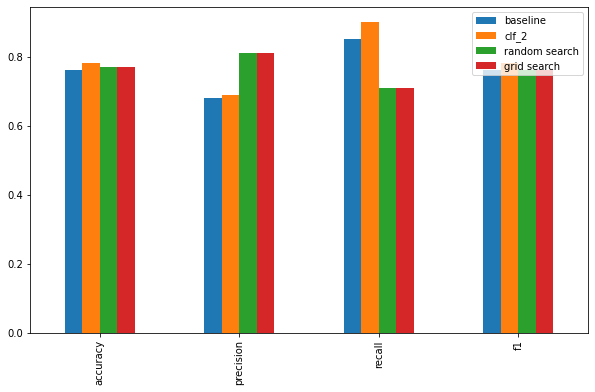

In [91]:
#Compare the different models metrics
comp_metrics = pd.DataFrame({"baseline": baseline_metrics,
                            "clf_2": clf_2_metrics,
                            "random search": rs_metrics,
                            "grid search": gs_metrics})

comp_metrics.plot.bar(figsize=(10,6));

### 6. Saving and loading the model

In [93]:
#Two ways of saving and loading models:
#1. With pythons pickle module
#2. With the joblib module

##### Pickle module

In [92]:
#Import
import pickle

In [ ]:
#Save model
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) #wb for: write binary

#Load model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb")) #rb for: read binary


##### Joblib module

In [94]:
#More efficient for larger models

#Import
from joblib import dump, load

In [ ]:
#Save model to file
dump(gs_clf, filenmae="gs_random_forest_model_2.joblib")

#Load models file
loaded_job_model = load(filename="gs_random_random_forst_model_2.joblib")

### 7. Pipeline workflow

#### Pipeline (building data for model)

In [97]:
#Importing and checking the data
import pandas as pd
data = pd.read_csv("../car-sales-extended-missing-data.csv")
data.dtypes, data.isna().sum()

(Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 Price            float64
 dtype: object,
 Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64)

In [102]:
#Pipeline = Follows a list of steps, every step is a tuple with a name and actions.

#Steps: Fill missing data, convert data to numbers, build a model

#Getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(9)

#Getting rid of missing target labels
data.dropna(subset=["Price"], inplace=True)

#Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
                        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                        ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
                            ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
                                ("imputer", SimpleImputer(strategy="mean"))])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                                transformers=[
                                    ("cat", categorical_transformer, categorical_features),
                                    ("door", door_transformer, door_features),
                                    ("num", numeric_transformer, numeric_features)])

#Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

#Split data
X = data.drop("Price", axis= 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.32675658770525595

#### Improving model with pipeline

In [107]:
#Using GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [150,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

#Uses the names of the pipelines above
#This excesses: The strategy of the attribute imputer of the num step in the preprocessor.
#And changes the mean to median
#The amount of underscores reflects the amount of steps to go back

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=150, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=150, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=150, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=150, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=150, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [108]:
gs_model.score(X_test, y_test)

0.401120388736638